<a href="https://colab.research.google.com/github/zolo012/Machine_learning/blob/main/PCA_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning & clustering

*Abstract: Dimension reduction and clustering of World bank job 2016 data*

Creator: Bereczki Zoltán 


In [ ]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

#1. Reading data
The worldbank_jobs_2016.tsv (can be found in the same folder with this notebook) file contains the Jobs (and other) data for the 2016 year, downloaded from The World Bank's webpage.

- Look at the data in any text editor. Build up an overall sense how the data is built up and how the missing values are represented.
- Read the file into a pandas dataframe and tell pandas the delimiter (or separator) that separates the columns and which special pattern means if a value is missing.
- Keep only those rows, which represents countries, at the end there are some useless rows (with missing country code).
- The data is in a long format. Convert it into a wide format, where each row is a single country (with country code) and the column names are the features i.e. the Series Codes, the values in the columns are the measured values of the 2016 [YR 2016 column]. (eg the first column is 'EG.CFT.ACCS.ZS', the second is 'EG.ELC.ACCS.ZS'. Order of the columns does not matter)! Try to use the pivot method.
- Check that the features are in numeric format (dtypes), this will be needed for modeling!

In [ ]:
# Open the downloaded tsv file from local computer

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 02_dataset_worldbank_jobs_2016.tsv to 02_dataset_worldbank_jobs_2016.tsv
User uploaded file "02_dataset_worldbank_jobs_2016.tsv" with length 3503374 bytes


In [ ]:
# Open the uploded tsv file by using pandas


wbj_2016_df = pd.read_csv(io.BytesIO(uploaded["02_dataset_worldbank_jobs_2016.tsv"]), sep='\t', na_values='..')  # sep or delimiter keys determines the column separater, na_values used to recognize nan value referring strings

# View the beginning of dataframe
wbj_2016_df.head()

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,84.137138
1,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,68.794200
2,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,86.570932
3,Afghanistan,AFG,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,20.965898
4,Afghanistan,AFG,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,5.971751


In [ ]:
# View the end of dataframe
wbj_2016_df.tail(20)

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
36007,Zimbabwe,ZWE,"Unemployment with intermediate education, male...",SL.UEM.INTM.MA.ZS,NaN
36008,Zimbabwe,ZWE,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,5.734000e+00
36009,Zimbabwe,ZWE,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,4.381000e+00
36010,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,5.046000e+00
36011,Zimbabwe,ZWE,"Unemployment, youth female (% of female labor ...",SL.UEM.1524.FE.ZS,9.510000e+00
36012,Zimbabwe,ZWE,"Unemployment, youth male (% of male labor forc...",SL.UEM.1524.MA.ZS,7.034000e+00
36013,Zimbabwe,ZWE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.185000e+00
36014,Zimbabwe,ZWE,Urban population,SP.URB.TOTL,5.215921e+06
36015,Zimbabwe,ZWE,Urban population (% of total),SP.URB.TOTL.IN.ZS,3.229600e+01
36016,Zimbabwe,ZWE,"Vulnerable employment, female (% of female emp...",SL.EMP.VULN.FE.ZS,7.619400e+01


The last 5 rows are meaningless, thus must remove.

In [ ]:
# Check the number of rows and columns of dataframe
wbj_2016_df.shape

(36027, 5)

36027 rows and 5 columns

In [ ]:
# Remove last 5 rows
wbj_2016_df.drop(range(36022, 36027), inplace=True)
wbj_2016_df

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,84.137138
1,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,68.794200
2,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,86.570932
3,Afghanistan,AFG,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,20.965898
4,Afghanistan,AFG,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,5.971751
...,...,...,...,...,...
36017,Zimbabwe,ZWE,"Vulnerable employment, male (% of male employm...",SL.EMP.VULN.MA.ZS,54.767000
36018,Zimbabwe,ZWE,"Vulnerable employment, total (% of total emplo...",SL.EMP.VULN.ZS,65.225000
36019,Zimbabwe,ZWE,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,23.323000
36020,Zimbabwe,ZWE,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,44.400002


In [ ]:
# Check the sum of nan values in each column
wbj_2016_df.isnull().sum()

Country Name         0
Country Code         0
Series Name          0
Series Code          0
2016 [YR2016]    12908
dtype: int64

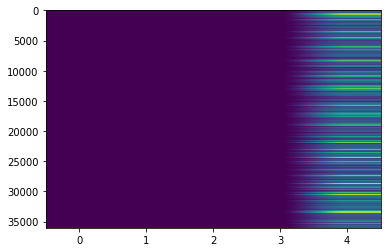

In [ ]:
# plot the nan values
plt.imshow(wbj_2016_df.isna(), aspect='auto')

In [ ]:
# Column names in dataframe

wbj_2016_df.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2016 [YR2016]'],
      dtype='object')

In [ ]:
# Convert dataframe from long to wide format by using pivot

wbj_2016_pivdf = pd.pivot_table(wbj_2016_df, index = 'Country Code', columns = 'Series Code', values = '2016 [YR2016]')
wbj_2016_pivdf

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FS.AST.DOMS.GD.ZS,FS.AST.PRVT.GD.ZS,GC.TAX.TOTL.GD.ZS,GC.TAX.YPKG.ZS,IC.BUS.NDNS.ZS,IC.BUS.NREG,IC.CRD.INFO.XQ,IC.CRD.PRVT.ZS,IC.CRD.PUBL.ZS,IC.FRM.CORR.ZS,IC.FRM.DURS,IC.ISV.DURS,IC.LGL.DURS,IC.PRP.DURS,IC.REG.DURS,IC.TAX.DURS,IC.TAX.METG,IC.TAX.PAYM,IQ.CPA.ECON.XQ,IQ.CPA.FINS.XQ,IQ.CPA.GNDR.XQ,IQ.CPA.MACR.XQ,IQ.CPA.PROP.XQ,IQ.CPA.PROT.XQ,IQ.CPA.SOCI.XQ,IS.AIR.DPRT,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.BBND.P2,...,SL.TLF.CACT.MA.ZS,SL.TLF.CACT.ZS,SL.TLF.INTM.FE.ZS,SL.TLF.INTM.MA.ZS,SL.TLF.INTM.ZS,SL.TLF.TOTL.IN,SL.UEM.1524.FE.ZS,SL.UEM.1524.MA.ZS,SL.UEM.1524.ZS,SL.UEM.ADVN.FE.ZS,SL.UEM.ADVN.MA.ZS,SL.UEM.ADVN.ZS,SL.UEM.INTM.FE.ZS,SL.UEM.INTM.MA.ZS,SL.UEM.INTM.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.ADO.TFRT,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,7.174353e+07,NaN,5.787158e+06,NaN,95.570145,582.344444,126.019533,NaN,102.485245,-0.893020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.8440,78.236,73.348,1.800,19121.0,18.241400,72487.0,69.152468,13214.0,12.606132,44.607999,0.459929,104822.0,59547.0,56.808,45275.0,43.192,4.918148,5.797836,0.105049,11.888156,3.758736
AFG,-0.075895,1.182164e+08,0.480710,2.774835e+08,NaN,84.137138,53.083405,1.074215,3.051954,137.904564,2.169452,-1.180492,3.598476,NaN,NaN,0.186024,3492.0,0.0,0.0,0.8,NaN,NaN,2.0,1642.0,250.0,7.5,275.0,NaN,19.0,3.000000,2.0,1.5,3.5,2.0,2.5,2.6,22770.0,62.335417,0.329501,0.025395,...,86.717003,54.234001,NaN,NaN,NaN,10551800.0,21.736000,16.816000,17.882000,NaN,NaN,NaN,NaN,NaN,NaN,13.016000,7.969000,8.841000,68.7942,65.024,62.412,4.635,15199971.0,43.859525,18575258.0,53.598917,880803.0,2.541558,86.570932,2.689163,34656032.0,25985093.0,74.980,8670939.0,25.020,0.262056,185.045514,NaN,434.379370,NaN
AGO,2.882138,1.176110e+09,4.305164,3.988048e+06,NaN,40.520607,23.111786,NaN,18.158775,213.197420,34.736159,28.754152,21.122165,10.323230,68.505606,NaN,NaN,0.0,0.0,1.9,NaN,NaN,NaN,1296.0,190.0,36.0,287.0,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15482.0,45.121699,1.056773,0.427352,...,80.179001,77.676003,NaN,NaN,NaN,11871028.0,18.059000,18.002001,18.031000,NaN,NaN,NaN,NaN,NaN,NaN,8.114000,7.333000,7.724000,154.4722,64.411,58.717,5.694,13530714.0,46.959694,14605793.0,50.690863,676956.0,2.349443,97.274212,3.367572,28813463.0,10329915.0,35.851,18483548.0,64.149,NaN,223.096447,NaN,344.731726,NaN
ALB,0.059209,1.471281e+08,8.786734,9.960014e+08,NaN,100.000000,104.967190,33.806812,157.797944,112.834428,1.282799,66.161879,36.557758,17.557178,16.516516,1.352325,2679.0,6.0,0.0,38.9,NaN,NaN,2.0,525.0,19.0,5.0,261.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.0,115.152265,8.496597,9.102779,...,65.053001,56.278000,NaN,NaN,NaN,1331755.0,30.385000,33.953999,32.731998,NaN,NaN,NaN,NaN,NaN,NaN,14.549000,15.705000,15.220000,20.6796,80.451,76.389,1.713,509714.0,17.722397,1997271.0,69.443689,369116.0,12.833914,44.001540,-0.159880,2876101.0,1195854.0,41.579,1680247.0,58.421,2.941437,556.660364,11.178982,750.385083,0.647751
AND,NaN,NaN,NaN,NaN,NaN,100.000000,164.427660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.513218,50.069228,42.041381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.944017,77281.0,9082.0,11.752,68199.0,88.248

In [ ]:
# Check all columns consist of numeric data types with dtypes

wbj_2016_pivdf.dtypes

Series Code
BM.KLT.DINV.WD.GD.ZS    float64
BM.TRF.PWKR.CD.DT       float64
BX.KLT.DINV.WD.GD.ZS    float64
BX.TRF.PWKR.CD          float64
CM.MKT.LCAP.GD.ZS       float64
                         ...   
TM.VAL.ICTG.ZS.UN       float64
TX.QTY.MRCH.XD.WD       float64
TX.VAL.FUEL.ZS.UN       float64
TX.VAL.MRCH.XD.WD       float64
TX.VAL.TECH.MF.ZS       float64
Length: 159, dtype: object

In [ ]:
# Another way to check all columns consist of numeric data with select_dtypes

wbj_2016_pivdf.select_dtypes(include=np.number).shape

(217, 159)

All columns contain numerical data types, float type exactly.

# 2. Data preprocessing and inspection
- Visualize the missing values!
- Keep only those countries which has less than 60 missing features in the original table.
- After this drop all features which have missing values for the remaining countries. (Imputation would also work but may introduce a bias because there is less data for less developed countries generally.)
- How many counties and features do we have left?
- Read the kept features' descriptions. In the original table the Series Name describe the meaning of the features. What do you think, based only on these information, which counties are the most similar to Hungary? And Greece?


In [ ]:
# Calculate the sum of missing values in wide form dataframe
wbj_2016_pivdf.isnull().sum()

Series Code
BM.KLT.DINV.WD.GD.ZS     56
BM.TRF.PWKR.CD.DT        50
BX.KLT.DINV.WD.GD.ZS     31
BX.TRF.PWKR.CD           72
CM.MKT.LCAP.GD.ZS       152
                       ... 
TM.VAL.ICTG.ZS.UN        74
TX.QTY.MRCH.XD.WD        16
TX.VAL.FUEL.ZS.UN        76
TX.VAL.MRCH.XD.WD        16
TX.VAL.TECH.MF.ZS        87
Length: 159, dtype: int64

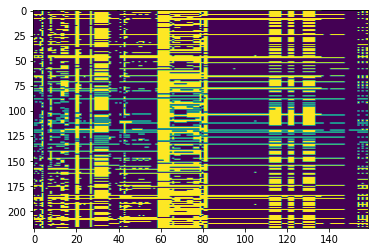

In [ ]:
# Plot the missing values in wide form dataframe
plt.imshow(wbj_2016_pivdf.isna(), aspect='auto')

In [ ]:
# Drop out rows if it has at least 60 missing values

# First calculate the minimum number of survival non-values
threshold = len(set(wbj_2016_df.loc[wbj_2016_df['Country Code'] == 'ABW']['Series Code'].values)) - 60 
print(threshold)
wbj_2016_pivdf.dropna(axis=0, thresh=threshold, inplace=True)
wbj_2016_pivdf

106


Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FS.AST.DOMS.GD.ZS,FS.AST.PRVT.GD.ZS,GC.TAX.TOTL.GD.ZS,GC.TAX.YPKG.ZS,IC.BUS.NDNS.ZS,IC.BUS.NREG,IC.CRD.INFO.XQ,IC.CRD.PRVT.ZS,IC.CRD.PUBL.ZS,IC.FRM.CORR.ZS,IC.FRM.DURS,IC.ISV.DURS,IC.LGL.DURS,IC.PRP.DURS,IC.REG.DURS,IC.TAX.DURS,IC.TAX.METG,IC.TAX.PAYM,IQ.CPA.ECON.XQ,IQ.CPA.FINS.XQ,IQ.CPA.GNDR.XQ,IQ.CPA.MACR.XQ,IQ.CPA.PROP.XQ,IQ.CPA.PROT.XQ,IQ.CPA.SOCI.XQ,IS.AIR.DPRT,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.BBND.P2,...,SL.TLF.CACT.MA.ZS,SL.TLF.CACT.ZS,SL.TLF.INTM.FE.ZS,SL.TLF.INTM.MA.ZS,SL.TLF.INTM.ZS,SL.TLF.TOTL.IN,SL.UEM.1524.FE.ZS,SL.UEM.1524.MA.ZS,SL.UEM.1524.ZS,SL.UEM.ADVN.FE.ZS,SL.UEM.ADVN.MA.ZS,SL.UEM.ADVN.ZS,SL.UEM.INTM.FE.ZS,SL.UEM.INTM.MA.ZS,SL.UEM.INTM.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.ADO.TFRT,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,-0.075895,1.182164e+08,0.480710,2.774835e+08,NaN,84.137138,53.083405,1.074215,3.051954,137.904564,2.169452,-1.180492,3.598476,NaN,NaN,0.186024,3492.0,0.0,0.0,0.8,NaN,NaN,2.0,1642.0,250.0,7.5,275.0,NaN,19.0,3.000000,2.0,1.5,3.5,2.0,2.5,2.6,22770.0,62.335417,0.329501,0.025395,...,86.717003,54.234001,NaN,NaN,NaN,10551800.0,21.736000,16.816000,17.882000,NaN,NaN,NaN,NaN,NaN,NaN,13.016000,7.969000,8.841000,68.7942,65.024,62.412,4.635,15199971.0,43.859525,18575258.0,53.598917,880803.0,2.541558,86.570932,2.689163,34656032.0,25985093.0,74.980,8670939.0,25.020,0.262056,185.045514,NaN,434.379370,NaN
ALB,0.059209,1.471281e+08,8.786734,9.960014e+08,NaN,100.000000,104.967190,33.806812,157.797944,112.834428,1.282799,66.161879,36.557758,17.557178,16.516516,1.352325,2679.0,6.0,0.0,38.9,NaN,NaN,2.0,525.0,19.0,5.0,261.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.0,115.152265,8.496597,9.102779,...,65.053001,56.278000,NaN,NaN,NaN,1331755.0,30.385000,33.953999,32.731998,NaN,NaN,NaN,NaN,NaN,NaN,14.549000,15.705000,15.220000,20.6796,80.451,76.389,1.713,509714.0,17.722397,1997271.0,69.443689,369116.0,12.833914,44.001540,-0.159880,2876101.0,1195854.0,41.579,1680247.0,58.421,2.941437,556.660364,11.178982,750.385083,0.647751
ARE,4.400397,NaN,2.516687,NaN,62.018334,100.000000,110.880526,65.683037,NaN,111.115726,1.617877,107.592995,83.893893,0.043495,NaN,29.693744,20597.0,7.0,53.8,8.9,NaN,NaN,3.2,445.0,1.5,8.2,12.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463947.0,214.734910,24.659166,13.998267,...,92.551003,80.375999,NaN,NaN,NaN,6415833.0,9.329000,3.814000,4.900000,NaN,NaN,NaN,NaN,NaN,NaN,4.598000,1.225000,1.636000,28.2274,78.767,76.565,1.748,1287338.0,13.887723,7881775.0,85.028100,100499.0,1.084177,17.608178,1.251759,9269612.0,1300990.0,14.035,7968622.0,85.965,5.535168,132.668467,20.228854,533.557945,2.321466
ARG,0.321978,8.235657e+08,0.587564,3.526393e+08,11.462532,100.000000,16.022067,60.103738,393.196312,NaN,NaN,38.114808,13.733413,12.155505,21.864873,NaN,NaN,8.0,100.0,41.6,NaN,NaN,2.4,995.0,51.5,24.0,359.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149334.0,145.330506,22.666391,16.493676,...,73.382004,59.964001,NaN,NaN,NaN,19704082.0,25.356001,22.395000,23.528000,NaN,NaN,NaN,NaN,NaN,NaN,9.557000,8.101000,8.696000,63.0272,80.310,72.777,2.293,10987577.0,25.058657,28009966.0,63.880519,4849887.0,11.060824,56.542246,0.984742,43847430.0,3671345.0,8.373,40176085.0,91.627,8.478812,124.366098,2.532451,219.174671,8.792815
ARM,0.627752,3.580155e+08,3.206058,6.086609e+08,NaN,100.000000,102.733263,61.139439,NaN,123.014934,-1.271210,54.370777,48.875644,21.277375,44.069393,1.735793,3573.0,8.0,71.1,0.0,NaN,NaN,1.9,570.0,7.0,4.5,313.0,NaN,14.0,NaN,NaN,Na

In [ ]:
# Drop features if have at least 1 missing values

wbj_2016_pivdf.dropna(axis=1, inplace=True)
wbj_2016_pivdf

Series Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,SL.EMP.MPYR.FE.ZS,SL.EMP.MPYR.MA.ZS,SL.EMP.MPYR.ZS,SL.EMP.OWAC.FE.ZS,SL.EMP.OWAC.MA.ZS,SL.EMP.OWAC.ZS,SL.EMP.SELF.FE.ZS,SL.EMP.SELF.MA.ZS,SL.EMP.SELF.ZS,SL.EMP.TOTL,SL.EMP.VULN.FE.ZS,SL.EMP.VULN.MA.ZS,SL.EMP.VULN.ZS,SL.EMP.WORK.FE.ZS,SL.EMP.WORK.MA.ZS,SL.EMP.WORK.ZS,SL.FAM.WORK.FE.ZS,SL.FAM.WORK.MA.ZS,SL.FAM.WORK.ZS,SL.IND.EMPL.FE.ZS,SL.IND.EMPL.MA.ZS,SL.IND.EMPL.ZS,SL.SRV.EMPL.FE.ZS,SL.SRV.EMPL.MA.ZS,SL.SRV.EMPL.ZS,SL.TLF.CACT.FE.ZS,SL.TLF.CACT.MA.ZS,SL.TLF.CACT.ZS,SL.TLF.TOTL.IN,SL.UEM.1524.FE.ZS,SL.UEM.1524.MA.ZS,SL.UEM.1524.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.ADO.TFRT,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,0.480710,84.137138,53.083405,62.335417,0.329501,10.595726,2.366712,72.621002,59.122002,61.348999,0.292,1.432,1.244,11.084000,45.612000,39.917999,69.418999,66.819000,67.248001,9618882.0,69.127998,65.386999,66.004000,30.580999,33.181000,32.751999,58.043999,19.775000,26.086000,5.559,6.975000,6.741000,21.820999,33.902000,31.910000,19.419001,86.717003,54.234001,10551800.0,21.736000,16.816000,17.882000,13.016000,7.969000,8.841000,68.7942,65.024,62.412,4.635,15199971.0,43.859525,18575258.0,53.598917,880803.0,2.541558,86.570932,2.689163,34656032.0,25985093.0,74.980,8670939.0,25.020
ALB,8.786734,100.000000,104.967190,115.152265,8.496597,66.363445,3.352159,47.271999,35.806000,40.659000,1.020,3.473,2.435,16.686001,34.481998,26.950001,58.007000,60.478001,59.431999,1129074.0,56.987000,57.003998,56.997002,41.993000,39.521999,40.568001,40.300999,22.521999,30.047001,13.652,21.976000,18.452999,39.076000,42.216999,40.888000,47.438999,65.053001,56.278000,1331755.0,30.385000,33.953999,32.731998,14.549000,15.705000,15.220000,20.6796,80.451,76.389,1.713,509714.0,17.722397,1997271.0,69.443689,369116.0,12.833914,44.001540,-0.159880,2876101.0,1195854.0,41.579,1680247.0,58.421
ARE,2.516687,100.000000,110.880526,214.734910,24.659166,90.600007,2.988442,0.013000,0.186000,0.166000,1.122,2.957,2.740,0.208000,0.364000,0.346000,1.363000,3.343000,3.109000,6310626.0,0.241000,0.386000,0.370000,98.637001,96.656998,96.890999,0.033000,0.022000,0.024000,4.378,39.566002,35.393002,95.647003,60.242001,64.441002,41.250999,92.551003,80.375999,6415833.0,9.329000,3.814000,4.900000,4.598000,1.225000,1.636000,28.2274,78.767,76.565,1.748,1287338.0,13.887723,7881775.0,85.028100,100499.0,1.084177,17.608178,1.251759,9269612.0,1300990.0,14.035,7968622.0,85.965
ARG,0.587564,100.000000,16.022067,145.330506,22.666391,70.968981,-1.822542,0.172000,0.808000,0.552000,2.435,4.962,3.939,16.434000,22.979000,20.327999,20.101000,28.422001,25.051001,18049589.0,17.666000,23.460000,21.112999,79.899002,71.578003,74.948997,1.232000,0.481000,0.785000,8.024,34.077999,23.625000,91.806000,65.112999,75.821999,47.430000,73.382004,59.964001,19704082.0,25.356001,22.395000,23.528000,9.557000,8.101000,8.696000,63.0272,80.310,72.777,2.293,10987577.0,25.058657,28009966.0,63.880519,4849887.0,11.060824,56.542246,0.984742,43847430.0,3671345.0,8.373,40176085.0,91.627
ARM,3.206058,100.000000,102.733263,117.428481,18.176323,64.346030,0.200000,38.342999,30.448999,34.050999,0.337,1.370,0.887,31.028999,36.179001,33.771000,40.841000,41.542999,41.215000,1149897.0,40.502999,40.173001,40.328000,59.159000,58.457001,58.785000,9.474000,3.994000,6.557000,7.476,22.856001,15.838000,54.181000,46.695000,50.111000,51.210999,70.334000,59.901001,1402993.0,41.159000,36.611000,38.591000,17.827000,18.226000,18.040001,23.9750,77.640,71.265,1.612,582629.0,19.920193,2018577.0,69.015521,323610.0,11.064286,44.894943,0.269302,2924816.0,1079784.0,36.918,1845032.0,63.

158 countries and 62 features remained. 

In [ ]:
# Check the explaination of EG.ELC.ACCS.ZS series code

wbj_2016_df[wbj_2016_df['Series Code'] == 'EG.ELC.ACCS.ZS']

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,84.137138
166,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000
332,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.439568
498,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
664,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000
...,...,...,...,...,...
35192,Virgin Islands (U.S.),VIR,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000
35358,West Bank and Gaza,PSE,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000
35524,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,71.642349
35690,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,27.219337


EG.ELC.ACCS.ZS encodes the access to electricity.

In [ ]:
wbj_2016_pivdf.loc[['HUN', 'GRC']]

Series Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,SL.EMP.MPYR.FE.ZS,SL.EMP.MPYR.MA.ZS,SL.EMP.MPYR.ZS,SL.EMP.OWAC.FE.ZS,SL.EMP.OWAC.MA.ZS,SL.EMP.OWAC.ZS,SL.EMP.SELF.FE.ZS,SL.EMP.SELF.MA.ZS,SL.EMP.SELF.ZS,SL.EMP.TOTL,SL.EMP.VULN.FE.ZS,SL.EMP.VULN.MA.ZS,SL.EMP.VULN.ZS,SL.EMP.WORK.FE.ZS,SL.EMP.WORK.MA.ZS,SL.EMP.WORK.ZS,SL.FAM.WORK.FE.ZS,SL.FAM.WORK.MA.ZS,SL.FAM.WORK.ZS,SL.IND.EMPL.FE.ZS,SL.IND.EMPL.MA.ZS,SL.IND.EMPL.ZS,SL.SRV.EMPL.FE.ZS,SL.SRV.EMPL.MA.ZS,SL.SRV.EMPL.ZS,SL.TLF.CACT.FE.ZS,SL.TLF.CACT.MA.ZS,SL.TLF.CACT.ZS,SL.TLF.TOTL.IN,SL.UEM.1524.FE.ZS,SL.UEM.1524.MA.ZS,SL.UEM.1524.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.ADO.TFRT,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HUN,55.489931,100.0,108.406307,120.778926,31.986518,79.259401,2.213187,2.841,6.889,5.040,3.160,6.456,4.951,4.653,6.234000,5.511,8.209000,12.930000,10.773000,4446630.0,5.049,6.474000,5.822,91.791000,87.070000,89.226997,0.396,0.24,0.311,19.160,39.921001,30.438,77.999001,53.191002,64.522003,47.962002,64.568001,55.751999,4686095.0,12.829000,12.870,12.852,5.105000,5.115000,5.110000,19.8054,79.0,72.3,1.45,1408772.0,14.354687,6637582.0,67.633651,1767669.0,18.011662,47.855394,-0.295111,9814023.0,2867756.0,29.221,6946267.0,70.779
GRC,1.588444,100.0,83.599465,112.117717,46.504668,69.087915,-0.244315,11.743,12.816,12.373,4.978,9.164,7.435,18.733,25.721001,22.834,29.490999,37.455002,34.165001,3751523.0,24.513,28.291001,26.730,70.509003,62.544998,65.834999,5.780,2.57,3.896,8.126,20.254000,15.245,80.130997,66.930000,72.383003,45.702000,60.965000,53.159000,4906562.0,50.740002,44.333,47.278,28.167999,19.908001,23.540001,7.4862,83.7,78.5,1.33,1545996.0,14.346698,7054236.0,65.462651,2175739.0,20.190650,52.758867,-0.415913,10775971.0,2329011.0,21.613,8446960.0,78.387


In [ ]:
print(wbj_2016_pivdf[wbj_2016_pivdf['EG.ELC.ACCS.ZS'] == 100].index)
len(wbj_2016_pivdf[wbj_2016_pivdf['EG.ELC.ACCS.ZS'] == 100].index) - 2

Index(['ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BGR', 'BHR',
       'BHS', 'BIH', 'BLR', 'BRA', 'BRN', 'BTN', 'CAN', 'CHE', 'CHL', 'CHN',
       'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM', 'EGY', 'ESP', 'EST', 'FIN',
       'FRA', 'GBR', 'GEO', 'GRC', 'HKG', 'HRV', 'HUN', 'IRL', 'IRN', 'ISL',
       'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KOR', 'KWT', 'LBN', 'LTU', 'LUX',
       'LVA', 'MAC', 'MAR', 'MDA', 'MDV', 'MEX', 'MKD', 'MLT', 'MNE', 'MYS',
       'NLD', 'NOR', 'NZL', 'OMN', 'POL', 'PRT', 'PSE', 'QAT', 'ROU', 'RUS',
       'SAU', 'SGP', 'SRB', 'SVK', 'SVN', 'SWE', 'THA', 'TJK', 'TTO', 'TUN',
       'TUR', 'UKR', 'URY', 'USA', 'UZB', 'VCT', 'VNM', 'WSM'],
      dtype='object', name='Country Code')


86

# 3. PCA

- Perform PCA with 3 principal components on the filtered, imputed data (from now on, data refers to the filtered, imputed dataset)
- Plot the three embedded 2D combination next to each other (0 vs 1, 0 vs 2 and 1 vs 2)
-It seems that the embedding is really dominated by a single direction. Normalize the data (each feature should have zero mean and unit variance after normalization) and re-do the PCA and the plotting (do not delete the previous plots, just make new ones).
-Give some explaination for the second principal component: Look at the coefficients of the features which were use the calculate that principal component. For the features with the largest coefficient (in absolute value) look up the Series Name for the Code.


In [ ]:
# Set PCA for 3 principal components
pca = PCA(n_components=3)
# Run PCA on filtered, imputed data
pca_components = pca.fit_transform(wbj_2016_pivdf)
# Make a dataframe with results
pca_components_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_components_df

,PCA1,PCA2,PCA3
0,-2.034223e+07,1.793729e+07,4.049926e+05
1,-6.560831e+07,2.450933e+06,-3.599266e+06
2,-5.386999e+07,-2.814314e+06,-3.794361e+06
3,-3.480821e+06,-1.980583e+07,1.189181e+07
4,-6.552120e+07,2.284867e+06,-3.496914e+06
...,...,...,...
153,-6.977440e+07,2.928741e+06,-3.855723e+06
154,-3.164376e+07,1.224050e+07,3.073326e+06
155,1.291302e+07,-4.297029e+06,1.207112e+07
156,-4.536610e+07,5.633397e+06,-1.383103e+06


In [ ]:
# Variance of components
pca.explained_variance_ratio_

array([0.97528815, 0.02236177, 0.00200416])

[Text(0, 0.5, 'Principle component 3'), Text(0.5, 0, 'Principle component 2')]

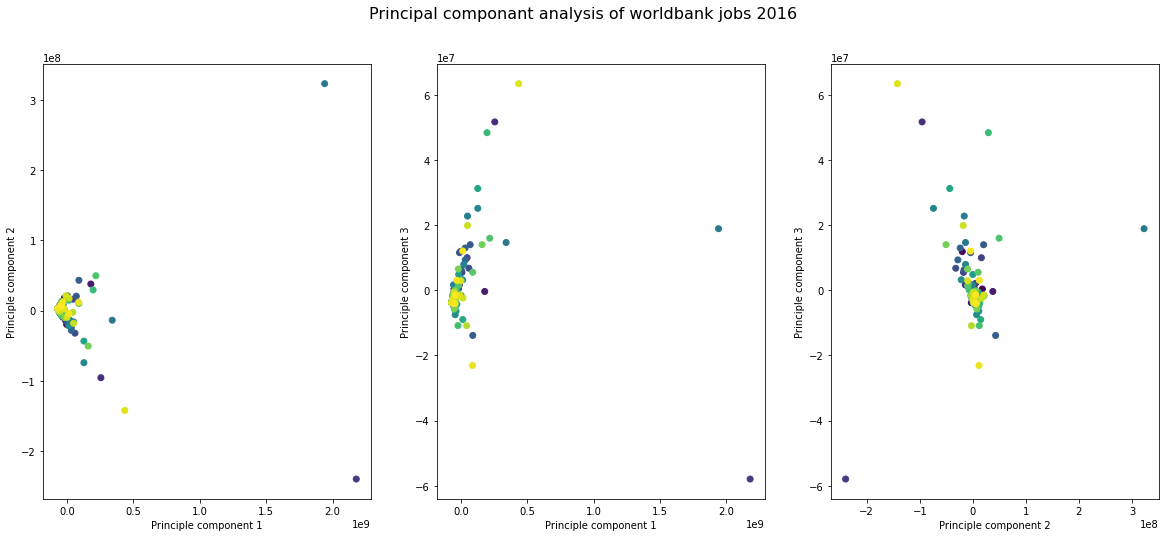

In [ ]:
# Plot 3 embedded 2D combination of PCA result

# Set the figure parameters
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Principal componant analysis of worldbank jobs 2016', fontsize=16)

# Plot PCA1 against PCA2
ax1.scatter(pca_components_df['PCA1'], pca_components_df['PCA2'], c=pca_components_df.index)
ax1.set(xlabel='Principle component 1', ylabel='Principle component 2')

# Plot PCA1 against PCA3
ax2.scatter(pca_components_df['PCA1'], pca_components_df['PCA3'], c=pca_components_df.index)
ax2.set(xlabel='Principle component 1', ylabel='Principle component 3')

# Plot PCA2 against PCA3
ax3.scatter(pca_components_df['PCA2'], pca_components_df['PCA3'], c=pca_components_df.index)
ax3.set(xlabel='Principle component 2', ylabel='Principle component 3')

The embedding is really dominated by a single direction -> must normalize the data

In [ ]:
# Normalize the data
norm_wbj_2016_array = StandardScaler().fit_transform(wbj_2016_pivdf)
print(norm_wbj_2016_array)
# Create dataframe to display normalized values well
norm_wbj_2016_array_df = pd.DataFrame(data=norm_wbj_2016_array, columns=wbj_2016_pivdf.columns, index=wbj_2016_pivdf.index)
norm_wbj_2016_array_df

[[-0.48180326  0.01509105 -0.1798433  ...  1.51947026 -0.20636817
  -1.51947026]
 [ 0.49203325  0.60113746 -0.15099725 ...  0.04956371 -0.29757199
  -0.04956371]
 [-0.24309597  0.60113746 -0.14770959 ... -1.1625888  -0.21553092
   1.1625888 ]
 ...
 [-0.45034589  0.01741345 -0.18368371 ... -0.25497068  0.15802133
   0.25497068]
 [-0.16731079 -2.08771193 -0.19694776 ...  0.75294135 -0.2276324
  -0.75294135]
 [-0.29618666 -1.68406307 -0.18614528 ...  1.19926907 -0.25144394
  -1.19926907]]


Series Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,SL.EMP.MPYR.FE.ZS,SL.EMP.MPYR.MA.ZS,SL.EMP.MPYR.ZS,SL.EMP.OWAC.FE.ZS,SL.EMP.OWAC.MA.ZS,SL.EMP.OWAC.ZS,SL.EMP.SELF.FE.ZS,SL.EMP.SELF.MA.ZS,SL.EMP.SELF.ZS,SL.EMP.TOTL,SL.EMP.VULN.FE.ZS,SL.EMP.VULN.MA.ZS,SL.EMP.VULN.ZS,SL.EMP.WORK.FE.ZS,SL.EMP.WORK.MA.ZS,SL.EMP.WORK.ZS,SL.FAM.WORK.FE.ZS,SL.FAM.WORK.MA.ZS,SL.FAM.WORK.ZS,SL.IND.EMPL.FE.ZS,SL.IND.EMPL.MA.ZS,SL.IND.EMPL.ZS,SL.SRV.EMPL.FE.ZS,SL.SRV.EMPL.MA.ZS,SL.SRV.EMPL.ZS,SL.TLF.CACT.FE.ZS,SL.TLF.CACT.MA.ZS,SL.TLF.CACT.ZS,SL.TLF.TOTL.IN,SL.UEM.1524.FE.ZS,SL.UEM.1524.MA.ZS,SL.UEM.1524.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.ADO.TFRT,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,-0.481803,0.015091,-0.179843,-1.283053,-1.045661,-1.527584,-0.118411,1.705807,1.465333,1.475828,-1.064957,-1.058831,-0.944099,-0.631682,0.937208,0.715022,1.035728,1.250819,1.125586,-0.138779,1.083209,1.331265,1.182410,-1.035728,-1.250819,-1.125586,2.661578,1.847845,1.562958,-0.799212,-1.784950,-1.515281,-1.540599,-0.895100,-1.135550,-2.176717,1.512272,-0.848352,-0.135431,0.138551,0.086748,0.068886,0.499325,0.152852,0.179661,0.589649,-1.188642,-0.987302,1.488765,0.096509,1.582881,-0.103472,-1.545123,-0.221700,-1.023992,1.626397,1.164675,-0.067772,0.061437,1.519470,-0.206368,-1.519470
ALB,0.492033,0.601137,-0.150997,0.081131,-0.529440,0.493921,0.120981,0.799799,0.445796,0.630956,-0.596345,-0.340318,-0.435094,-0.352776,0.343100,0.027332,0.651577,0.974901,0.821404,-0.255159,0.677605,0.979805,0.840309,-0.651577,-0.974901,-0.821404,1.614742,2.205422,1.913762,0.251723,-0.366366,-0.191782,-0.901125,-0.386621,-0.687069,-0.320193,-0.914241,-0.649166,-0.256297,0.734191,1.566370,1.287548,0.701729,1.532717,1.239458,-0.618877,0.675696,0.829527,-0.702080,-0.300621,-0.872375,-0.257826,0.787284,-0.259409,0.634731,-0.785676,-1.363441,-0.271893,-0.227753,0.049564,-0.297572,-0.049564
ARE,-0.243096,0.601137,-0.147710,2.653208,0.492152,1.372464,0.032624,-0.889304,-1.111757,-1.022568,-0.530688,-0.521970,-0.304744,-1.173164,-1.478083,-1.383473,-1.255174,-1.511238,-1.370562,-0.184129,-1.218156,-1.393924,-1.310476,1.255174,1.511238,1.370562,-0.761067,-0.723409,-0.745208,-0.952573,1.297051,1.722501,1.195406,0.715644,0.489482,-0.730192,2.165719,1.699173,-0.189650,-0.715895,-1.035790,-0.996480,-0.612111,-1.050070,-1.017367,-0.429294,0.472186,0.852405,-0.675837,-0.279599,-1.232595,-0.203037,3.081365,-0.279205,-1.258865,-2.281180,-0.110814,-0.230828,-0.226527,-1.162589,-0.215531,1.162589
ARG,-0.469275,0.601137,-0.200448,0.860591,0.366194,0.660865,-1.136094,-0.883621,-1.084559,-1.006806,0.314487,0.183870,0.207681,-0.365323,-0.270918,-0.323831,-0.624415,-0.419965,-0.516628,-0.023209,-0.636025,-0.426539,-0.522623,0.624415,0.419965,0.516628,-0.690327,-0.663661,-0.677810,-0.479113,0.778072,0.392674,1.053057,1.013515,1.058001,-0.320790,0.018663,-0.289967,-0.015454,0.387853,0.568415,0.532224,0.042630,0.176397,0.155571,0.444796,0.658657,0.360014,-0.267210,-0.017367,-0.183226,-0.015628,-0.031634,0.070803,0.348979,-0.075093,-0.347753,-0.008737,-0.198875,-1.411761,0.204663,1.411761
ARM,-0.162271,0.601137,-0.152239,0.139922,0.082389,0.420792,-0.644764,0.480664,0.211551,0.361119,-1.035991,-1.080658,-1.096672,0.361317,0.433685,0.389048,0.073735,0.150974,0.112439,-0.254873,0.126910,0.274159,0.207194,-0.073735,-0.150974,-0.112439,-0.204049,-0.206373,-0.166617,-0.550275,-0.283147,-0.487286,-0.341331,-0.112783,-0.226349,-0.070272,-0.322734,-0.296106,-0.255363,1.476175,1.795764,1.768366,1.134526,1.982387,1.707969,-0.536105,0.335989,0.163474,-0.777807,-0.298650,-0.665920,-0.257627,0.724256,-0.262763,0.

In [ ]:
# Check the normalization

print('The mean of normalized data: {}'.format(np.mean(norm_wbj_2016_array)))
print('The standard deviation of normalized data: {}'.format(np.std(norm_wbj_2016_array)))

The mean of normalized data: 1.4071589499536487e-16
The standard deviation of normalized data: 1.0


The mean of normalized data is very close to 0 while its standard deviation equals to 1, thus normalization was successful.

In [ ]:
# Run PCA on normalized data with fit_transform

norm_pca_components = pca.fit_transform(norm_wbj_2016_array)

# Check variance of components
print(pca.explained_variance_ratio_)

norm_pca_components_df = pd.DataFrame(data=norm_pca_components, columns=['PCA1', 'PCA2', 'PCA3'])
norm_pca_components_df

[0.45524826 0.12916399 0.09894654]


,PCA1,PCA2,PCA3
0,7.406510,-0.912487,1.498133
1,1.281226,-0.980626,2.395552
2,-6.148106,0.816645,-4.095771
3,-3.669199,-0.182758,0.308472
4,-0.587827,-1.482329,2.883147
...,...,...,...
153,-0.661612,-1.479240,2.326698
154,2.681851,-2.703121,6.022930
155,-3.965310,-2.225903,6.508138
156,8.459963,-0.943874,-0.351402


First three PCs are responsible for about 68% variance in data.

[Text(0, 0.5, 'Principle component 3'), Text(0.5, 0, 'Principle component 2')]

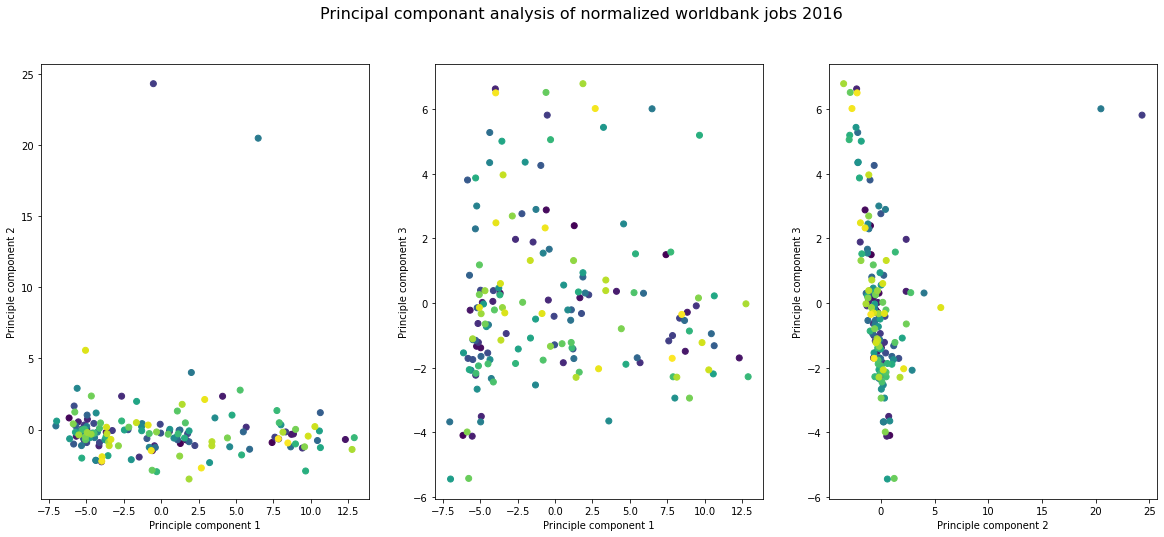

In [ ]:
# Plot the three embedded 2D combination next to each other

# Set the parameters of figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Principal componant analysis of normalized worldbank jobs 2016', fontsize=16)

# PCA1 vs PCA2
ax1.scatter(norm_pca_components_df['PCA1'], norm_pca_components_df['PCA2'], c=norm_pca_components_df.index)
ax1.set(xlabel='Principle component 1', ylabel='Principle component 2')

# PCA1 vs PCA3
ax2.scatter(norm_pca_components_df['PCA1'], norm_pca_components_df['PCA3'], c=norm_pca_components_df.index)
ax2.set(xlabel='Principle component 1', ylabel='Principle component 3')

# PCA2 vs PCA3
ax3.scatter(norm_pca_components_df['PCA2'], norm_pca_components_df['PCA3'], c=norm_pca_components_df.index)
ax3.set(xlabel='Principle component 2', ylabel='Principle component 3')

In [ ]:
# Importance of original features according to PCA2

# array with the correlation coefficient of second principle component: contains different PCA values in different list in this array, thus must index 1 (=PCA2)
# used abs function of numpy since I need to find the first several mostly correlating features
loadings_pca2 = abs(pca.components_[1])


# Create dictonary
loadings_pca2_df = pd.DataFrame.from_dict({'PCA2' : loadings_pca2})
loadings_pca2_df.set_index(wbj_2016_pivdf.columns, inplace=True)
loadings_pca2_df

,PCA2
Series Code,
BX.KLT.DINV.WD.GD.ZS,0.018182
EG.ELC.ACCS.ZS,0.050108
EN.POP.DNST,0.012936
IT.CEL.SETS.P2,0.015528
IT.MLT.MAIN.P2,0.012737
...,...
SP.POP.TOTL,0.336751
SP.RUR.TOTL,0.317782
SP.RUR.TOTL.ZS,0.010806


In [ ]:
#Find the first 5 most correlating features with pca2 loadings

for i in sorted(loadings_pca2, reverse=True)[0:5]:
  print(loadings_pca2_df[loadings_pca2_df['PCA2'] == i])


                    PCA2
Series Code             
SP.POP.1564.TO  0.337634
                 PCA2
Series Code          
SP.POP.TOTL  0.336751
                PCA2
Series Code         
SL.EMP.TOTL  0.33673
                    PCA2
Series Code             
SL.TLF.TOTL.IN  0.336093
                 PCA2
Series Code          
SP.URB.TOTL  0.328631


The 5 most important features that are contributed to second principle component are **population ages 15-64 (% of total) (33.76%), total population (33.68%), total employment (ages 15+) (33.67%), total labor force and urban population.** All in all the PCA2 is mostly composed of social features, mainly that part of population which contain such people who can work.  

# 4. T-SNE

- Perform T-SNE on the scaled data with 2 components
- Plot the embeddings results. Add a text label for each point to make it possible to interpret the results. It will not be possible to read all, but try to make it useful, see the attached image as an example!
- Highlight Hungary, Greece, Norway, China, Russia (HUN, GRC, NOR, CHN, RUS)! Which countries are the closest one to Hungary and Greece?

In [ ]:
tsne = TSNE(n_components=2)

tsne_results = tsne.fit_transform(norm_wbj_2016_array)
tsne_results_df = pd.DataFrame(data = tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_results_df

,TSNE1,TSNE2
0,-4.112624,9.655278
1,0.171995,7.150800
2,-3.064510,-6.878913
3,1.243100,-0.968976
4,3.745875,1.473015
...,...,...
153,-4.901751,1.794354
154,2.645553,5.684572
155,5.261400,2.484034
156,-6.131490,10.634078


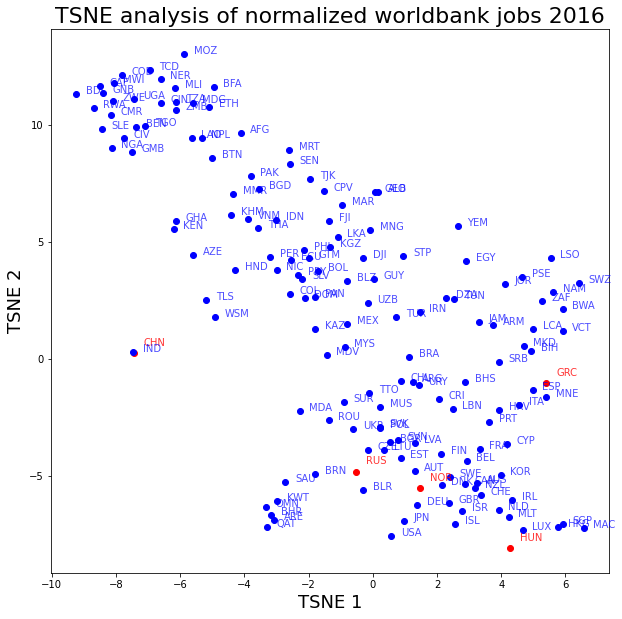

In [ ]:
# Plot TSNE result and add text labels for each point and highlight Hungary, Greece, Norway, China, Russia

# Setting figure parameters
plt.figure(figsize=(10, 10))
plt.title('TSNE analysis of normalized worldbank jobs 2016', fontsize=22)
plt.xlabel('TSNE 1', fontsize=18)
plt.ylabel('TSNE 2', fontsize=18)

# Do scatter plot and higlight Hungary, Greece, Norway, China, Russia points
imp_countries_list = ['HUN', 'GRC', 'NOR', 'CHN', 'RUS']
for i in range(tsne_results_df.shape[0]):
  if wbj_2016_pivdf.index[i] in imp_countries_list:
    plt.scatter(tsne_results_df.loc[i, 'TSNE1'], tsne_results_df.loc[i, 'TSNE2'], c='r')
    plt.text(tsne_results_df.loc[i, 'TSNE1'] + 0.3, tsne_results_df.loc[i, 'TSNE2'] + 0.3, s = wbj_2016_pivdf.index[i], color = 'r', alpha = 0.8)
  elif wbj_2016_pivdf.index[i] not in imp_countries_list:
    plt.scatter(tsne_results_df.loc[i, 'TSNE1'], tsne_results_df.loc[i, 'TSNE2'], c='b')
    plt.text(tsne_results_df.loc[i, 'TSNE1'] + 0.3, tsne_results_df.loc[i, 'TSNE2'], s = wbj_2016_pivdf.index[i], color = 'b', alpha = 0.7)


We can see which countries are in the closest in term of TSNE to the five highlighted countries in the above figure. 